# Color deconvolution of immunostained histology images
This notebook gives an example on how to use color deconvolution of IHC images. I use the color deconvolution method of skimage (http://scikit-image.org/docs/dev/auto_examples/plot_ihc_color_separation.html). An alternative implementation can be found here: https://gist.github.com/odebeir/5038467.
## Initialize

In [65]:
# import libraries
from PIL import Image
from StringIO import StringIO
from matplotlib.pyplot import imshow
import numpy as np
import requests
%matplotlib inline

##Import source image

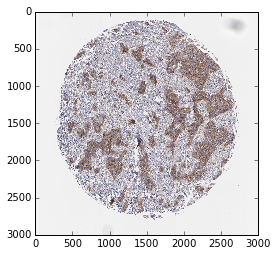

In [66]:
# get image from proteinatlas
url = 'http://www.proteinatlas.org/images/1383/4496_A_4_2.jpg'
response = requests.get(url)
img = Image.open(StringIO(response.content))
imshow(np.asarray(img))

## Perform color deconvolution using skimage

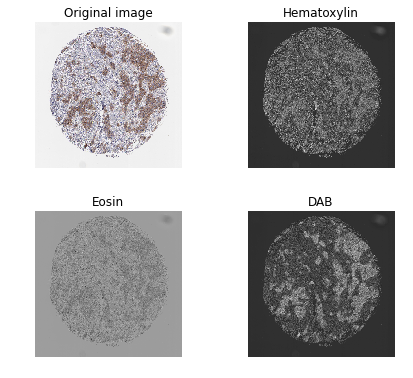

In [67]:
# import scikit-image color deconvolution
from skimage.color import rgb2hed

# transform RGB to HED colorspace
ihc_hed = rgb2hed(img)

# plot all channels
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(img)
ax0.set_title("Original image")

ax1.imshow(ihc_hed[:, :, 0], cmap=plt.cm.gray)
ax1.set_title("Hematoxylin")

ax2.imshow(ihc_hed[:, :, 1], cmap=plt.cm.gray)
ax2.set_title("Eosin")

ax3.imshow(ihc_hed[:, :, 2], cmap=plt.cm.gray)
ax3.set_title("DAB")

# decorations
for ax in axes.ravel():
    ax.axis('off')
fig.subplots_adjust(hspace=0.3)

###Analyze eosin (= residual) channel
In the present case, the sample is stained with hematoxylin and DAB only, so the eosin channel should represent the residual. Ideally, the eosin channel should be empty.

<matplotlib.colorbar.Colorbar instance at 0x11c921638>

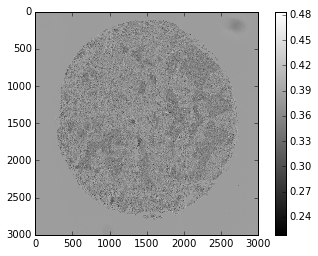

In [68]:
imshow(ihc_hed[:, :, 1],cmap=plt.cm.gray)
plt.colorbar()

## Change standard values for deconvolution vectors
more information: https://github.com/scikit-image/scikit-image/blob/master/skimage/color/colorconv.py
### Manually call color deconvolution function with skimage standard values

In [69]:
from scipy import linalg
from skimage.color import separate_stains

# Ruifrok's standard values
rgb_from_hed = np.array([[0.65, 0.70, 0.29],
                         [0.07, 0.99, 0.11],
                         [0.27, 0.57, 0.78]])
hed_from_rgb = linalg.inv(rgb_from_hed)

# perform color deconvolution
img_hed_custom = separate_stains(img, hed_from_rgb)

# restore original rgb image
from skimage.color import combine_stains
original_img_restored = combine_stains(img_hed_custom, rgb_from_hed)

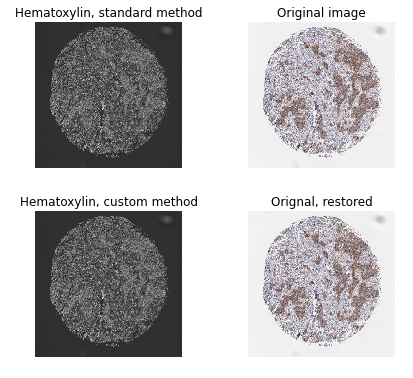

In [70]:
# plot all channels
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(ihc_hed[:, :, 0], cmap=plt.cm.gray)
ax0.set_title("Hematoxylin, standard method")

ax1.imshow(img)
ax1.set_title("Original image")

ax2.imshow(img_hed_custom[:, :, 0], cmap=plt.cm.gray)
ax2.set_title("Hematoxylin, custom method")

ax3.imshow(original_img_restored)
ax3.set_title("Orignal, restored")

# decorations
for ax in axes.ravel():
    ax.axis('off')
fig.subplots_adjust(hspace=0.3)

### Manually call color deconvolution function with Fiji standard values